In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [156]:
df_baseline = pd.read_csv("results_csv/results_baseline.csv")
df_6b = pd.read_csv("results_csv/results_6breaths.csv")
df_10b = pd.read_csv("results_csv/results_10breaths.csv")
df_15b = pd.read_csv("results_csv/results_15breaths.csv")
df_metadata = pd.read_excel("data/metadane.xlsx")

In [157]:
df_metadata = df_metadata[["L.poj.", "płeć", "wiek"]]
df_metadata = df_metadata.rename(columns={"L.poj.": "id", "wiek": "age", "płeć": "sex"})
df_metadata["sex"] = df_metadata["sex"].str.strip()
df_metadata.head()

,id,sex,age
0,1,K,22
1,2,M,20
2,3,M,20
3,4,K,23
4,5,K,21


In [158]:
# pick only id, te_hp_on_sap, te_sap_on_hp columns and rename them accordingly
df_baseline = df_baseline[["id", "r", "etco2", "te_hp_on_sap", "te_sap_on_hp",]]
df_6b = df_6b[["id", "te_hp_on_sap", "te_sap_on_hp"]]
df_10b = df_10b[["id", "te_hp_on_sap", "te_sap_on_hp"]]
df_15b = df_15b[["id", "te_hp_on_sap", "te_sap_on_hp"]]

df_baseline = df_baseline.rename(columns={"r": "respiratory_baseline", "etco2":"etco2_baseline","te_hp_on_sap": "baseline_te_hp_on_sap", "te_sap_on_hp": "baseline_te_sap_on_hp"})
df_6b = df_6b.rename(columns={"te_hp_on_sap": "te_hp_on_sap_6b", "te_sap_on_hp": "te_sap_on_hp_6b"})
df_10b = df_10b.rename(columns={"te_hp_on_sap": "te_hp_on_sap_10b", "te_sap_on_hp": "te_sap_on_hp_10b"})
df_15b = df_15b.rename(columns={"te_hp_on_sap": "te_hp_on_sap_15b", "te_sap_on_hp": "te_sap_on_hp_15b"})

# merge all dataframes on id
df = pd.merge(df_metadata, df_baseline, on="id")
df = pd.merge(df, df_6b, on="id")
df = pd.merge(df, df_10b, on="id")
df = pd.merge(df, df_15b, on="id")

# remove id column
df = df.drop(columns=["id"])

In [159]:
df.describe()

,age,respiratory_baseline,etco2_baseline,baseline_te_hp_on_sap,baseline_te_sap_on_hp,te_hp_on_sap_6b,te_sap_on_hp_6b,te_hp_on_sap_10b,te_sap_on_hp_10b,te_hp_on_sap_15b,te_sap_on_hp_15b
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,22.541667,16.832965,38.260851,0.916320,1.070730,0.726146,0.606761,0.820505,0.921869,0.776631,1.000351
std,3.148211,4.427319,3.359011,0.229413,0.212595,0.161962,0.154545,0.223651,0.227860,0.239879,0.171961
min,18.000000,9.634073,32.534684,0.267068,0.430449,0.371470,0.283020,0.202559,0.459446,0.200841,0.648706
25%,20.750000,13.222311,36.297407,0.845776,0.940000,0.597474,0.497550,0.703437,0.788918,0.638152,0.902879
50%,22.000000,17.013230,38.087978,0.928797,1.073981,0.752353,0.591790,0.845426,0.918829,0.808597,1.000308
75%,24.250000,20.197643,40.240064,1.037090,1.255285,0.818704,0.715376,0.975895,1.033418,0.949882,1.122809
max,31.000000,23.960226,45.512716,1.321890,1.452878,1.044237,1.002821,1.123539,1.408595,1.108528,1.263871


In [160]:
df["sex"].value_counts()

sex
K    15
M     9
Name: count, dtype: int64

In [161]:
# save the dataframe to a csv file
df.to_csv("results_csv/simc_combined.csv", index=False)

# Box plots

In [162]:
def make_boxplot(df):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    plt.boxplot([df["baseline_te_hp_on_sap"], df["te_hp_on_sap_6b"], df["te_hp_on_sap_10b"], df["te_hp_on_sap_15b"]], tick_labels=["baseline", "6b", "10b", "15b"])
    plt.title("TE HP on SAP")
    plt.ylabel("TE HP on SAP")
    plt.subplot(1, 2, 2)
    plt.boxplot([df["baseline_te_sap_on_hp"], df["te_sap_on_hp_6b"], df["te_sap_on_hp_10b"], df["te_sap_on_hp_15b"]], tick_labels=["baseline", "6b", "10b", "15b"])
    plt.title("TE SAP on HP")
    plt.ylabel("TE SAP on HP")
    plt.show()

## All data combined

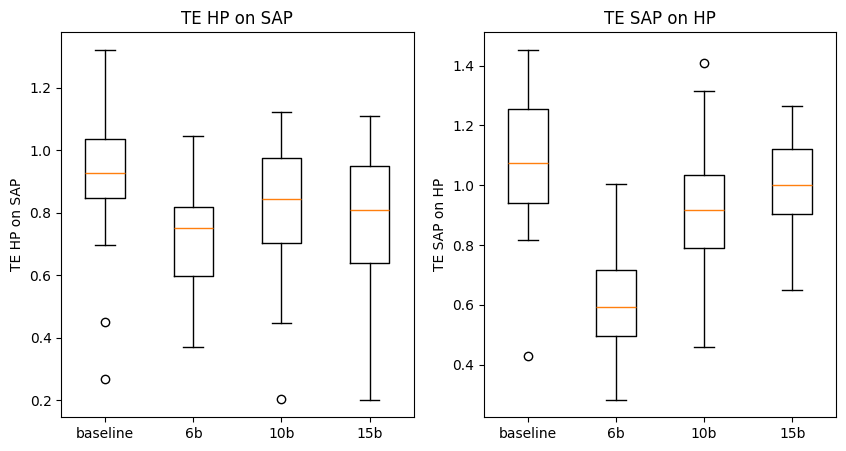

In [163]:
make_boxplot(df)

## Men vs Women

Men:


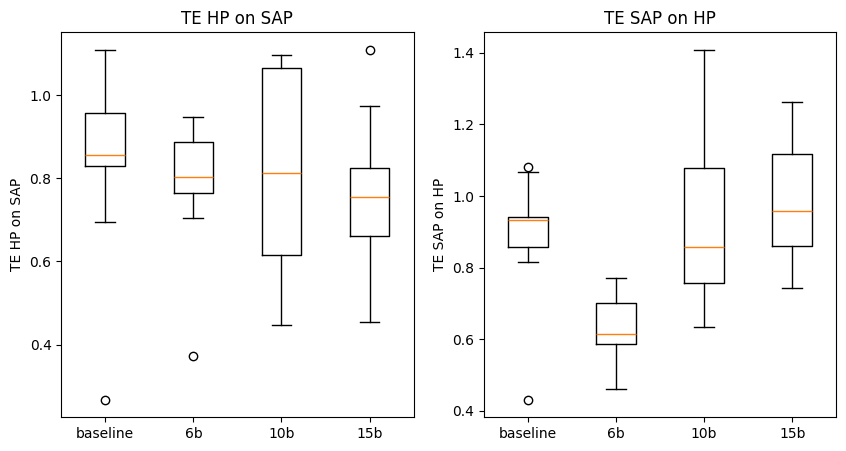

Women:


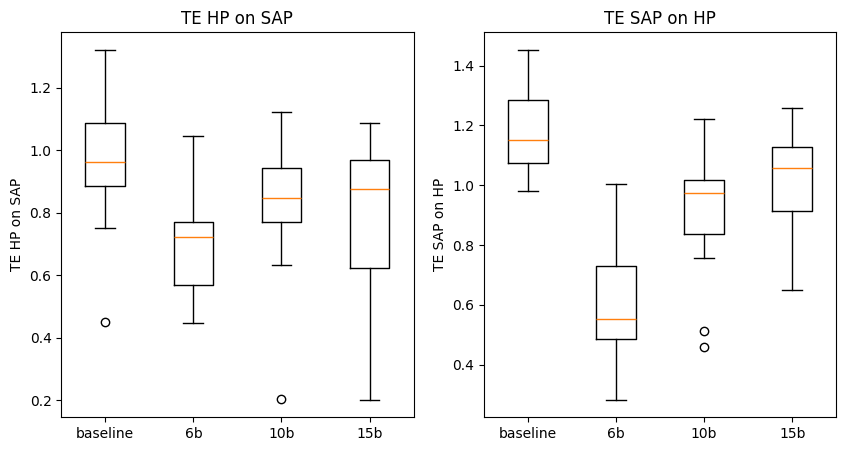

In [164]:
df_men = df[df["sex"] == "M"]
df_women = df[df["sex"] == "K"]

print("Men:")
make_boxplot(df_men)
print("Women:")
make_boxplot(df_women)

## r below 15 vs above 15

Above 15:


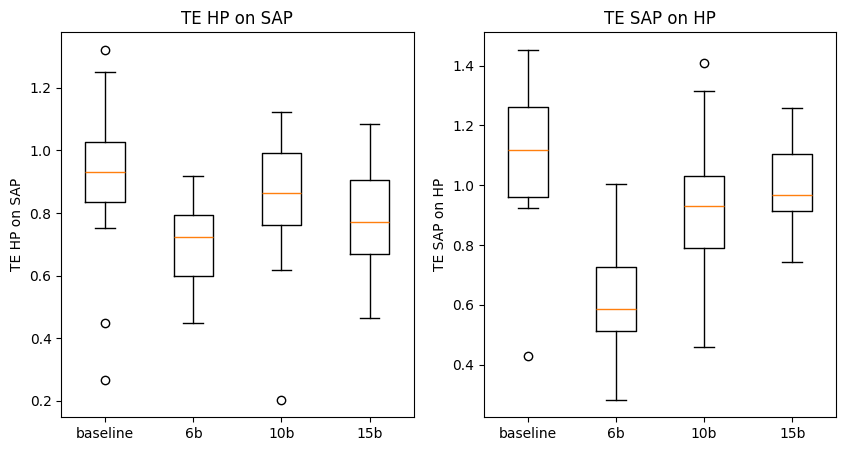

Below 15:


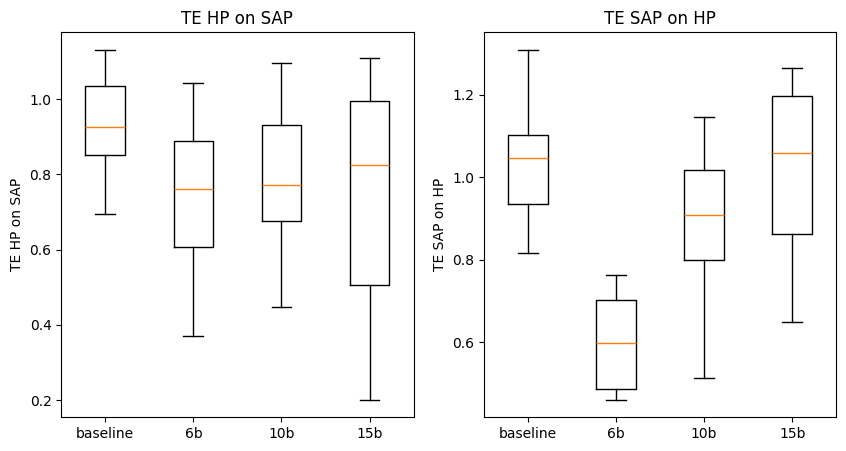

In [165]:
df_above_15 = df[df["respiratory_baseline"] > 15]
df_below_15 = df[df["respiratory_baseline"] <= 15]
print("Above 15:")
make_boxplot(df_above_15)
print("Below 15:")
make_boxplot(df_below_15)

# Statistics

In [166]:
def anova(df, column):
    f, p = stats.f_oneway(df[f"baseline_{column}"], df[f"{column}_6b"], df[f"{column}_10b"], df[f"{column}_15b"])
    print(f"ANOVA {column}: F = {f}, p = {p}")


## All data combined

In [167]:
anova(df, "te_hp_on_sap")
anova(df, "te_sap_on_hp")

ANOVA te_hp_on_sap: F = 3.357393978329235, p = 0.02219663354077927
ANOVA te_sap_on_hp: F = 26.71139695791054, p = 1.6251273318105096e-12


## Men vs Women

In [168]:
print("For Men:")
anova(df_men, "te_hp_on_sap")
anova(df_men, "te_sap_on_hp")

print()

print("For Women:")
anova(df_women, "te_hp_on_sap")
anova(df_women, "te_sap_on_hp")

For Men:
ANOVA te_hp_on_sap: F = 0.2636183982576795, p = 0.8510769878606494
ANOVA te_sap_on_hp: F = 6.283146104052355, p = 0.001782824586827423

For Women:
ANOVA te_hp_on_sap: F = 4.347058987402467, p = 0.008004511325565157
ANOVA te_sap_on_hp: F = 28.633697600248492, p = 2.351018306543123e-11


## r below 15 vs above 15

In [169]:
print("For Above 15:")
anova(df_above_15, "te_hp_on_sap")
anova(df_above_15, "te_sap_on_hp")

print()

print("For Below 15:")
anova(df_below_15, "te_hp_on_sap")
anova(df_below_15, "te_sap_on_hp")

For Above 15:
ANOVA te_hp_on_sap: F = 2.1961862950713975, p = 0.09859814986753418
ANOVA te_sap_on_hp: F = 15.47756147143305, p = 1.8868169508834718e-07

For Below 15:
ANOVA te_hp_on_sap: F = 1.278741377799969, p = 0.29833860106249255
ANOVA te_sap_on_hp: F = 10.779964865950134, p = 4.720352850188371e-05
